In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

from matplotlib import rcParams

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')  




scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [2]:
corrected=sc.read('../../H5AD/pSLEvsHD_Scrub_AC_073019.h5ad')
corrected

AnnData object with n_obs × n_vars = 258868 × 1205 
    obs: 'n_genes', 'total_features_by_counts', 'log1p_total_features_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_features', 'pct_counts_in_top_100_features', 'pct_counts_in_top_200_features', 'pct_counts_in_top_500_features', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'n_counts', 'louvain', 'clusters', 'IDs', 'Sample_ids', 'Age', 'Eth_Race', 'SLEDAI_1', 'Groups', 'Batches', 'SLEDAI', 'Names', 'DA', 'Subclusters', 'clusters_grp'
    var: 'gene_ids', 'n_cells', 'mito', 'mean_counts', 'log1p_mean_counts', 'n_cells_by_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Batches_colors', 'Groups_colors', 'SLEDAI_colors', 'bbknn', 'clusters_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [3]:
#-------------------------------------  SUBCLUSTERS --------------------------------#

#--- Extrcat NK cells 

#------- remove doublets from CL12 (CL12_woD)

cells_of_interest =corrected.obs.loc[corrected.obs["clusters"].isin(["C7: CD16 NK"]), :].index
NK = corrected[cells_of_interest, :]
NK



View of AnnData object with n_obs × n_vars = 15412 × 1205 
    obs: 'n_genes', 'total_features_by_counts', 'log1p_total_features_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_features', 'pct_counts_in_top_100_features', 'pct_counts_in_top_200_features', 'pct_counts_in_top_500_features', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'n_counts', 'louvain', 'clusters', 'IDs', 'Sample_ids', 'Age', 'Eth_Race', 'SLEDAI_1', 'Groups', 'Batches', 'SLEDAI', 'Names'
    var: 'gene_ids', 'n_cells', 'mito', 'mean_counts', 'log1p_mean_counts', 'n_cells_by_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Batches_colors', 'Groups_colors', 'SLEDAI_colors', 'bbknn', 'clusters_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [4]:
#-- runing Louvain
sc.tl.louvain(NK, resolution=0.4) #default , resolution = 1

#-- runing UMAP
sc.tl.umap(NK, min_dist=0.3, n_components=3)


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:04.75) --> found 5 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
computing UMAP
    finished (0:00:29.14) --> added
    'X_umap', UMAP coordinates (adata.obsm)


In [5]:
NK.uns['clusters_colors']=['#e41a1c','#999999','#377eb8','#4daf4a','#984ea3','#ff7f00','#a65628','#f781bf','#7fcdbb','#cab2d6', 
                           "#060404", "#bdbdbd", "#addd8e","#dd1c77","#fed976", "#08519c","#7a0177", "#016450", "#df65b0",
                                  "#a6761d",'#41b6c4',"#02818a",'#ece2f0','#d94801']

NK.uns['Groups_colors']= ['#78c679','#756bb1']
NK.uns['DA_colors']=["yellow","orange","red","#d2f3e0","grey"]



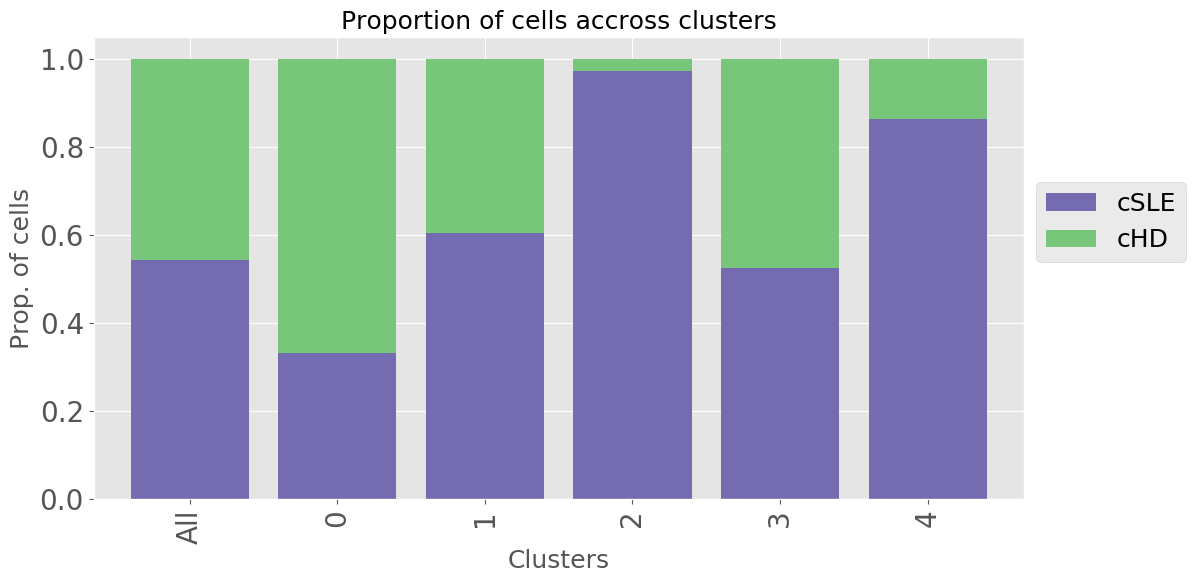

In [9]:

#-- proportion table

Groups_tab = pd.crosstab(index=NK.obs['louvain'],  # Make a crosstab
                        columns=NK.obs['Groups'], margins=True)               # Name the count column


#-- change index and columns order
#Groups_tab = Groups_tab.reindex(['All','0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'])
Groups_tab = Groups_tab.reindex(['All','0','1','2','3','4'])

Groups_tab = Groups_tab[['cSLE','cHD','All']]

MyTab= Groups_tab.div(Groups_tab["All"], axis=0)
MyTab2 = MyTab.drop(columns="All")

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')   
#colors
Col_Group =["#756bb1","#78c679"] 


MyTab2.plot(kind="bar",
            figsize=(12,6),
            stacked=True, 
            linewidth=1, 
            width=0.8, fontsize=20, color=Col_Group)
plt.title("Proportion of cells accross clusters", fontsize=18)
plt.ylabel("Prop. of cells", fontsize=18)
plt.xlabel("Clusters", fontsize=18)
plt.ylim=1.0

#plt.axhline(y=0.7, color='Black', linestyle='-')

#plt.gca().get_legend().remove() #remove legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.6), fontsize=18)
plt.show()

ranking genes
    finished (0:00:04.72) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


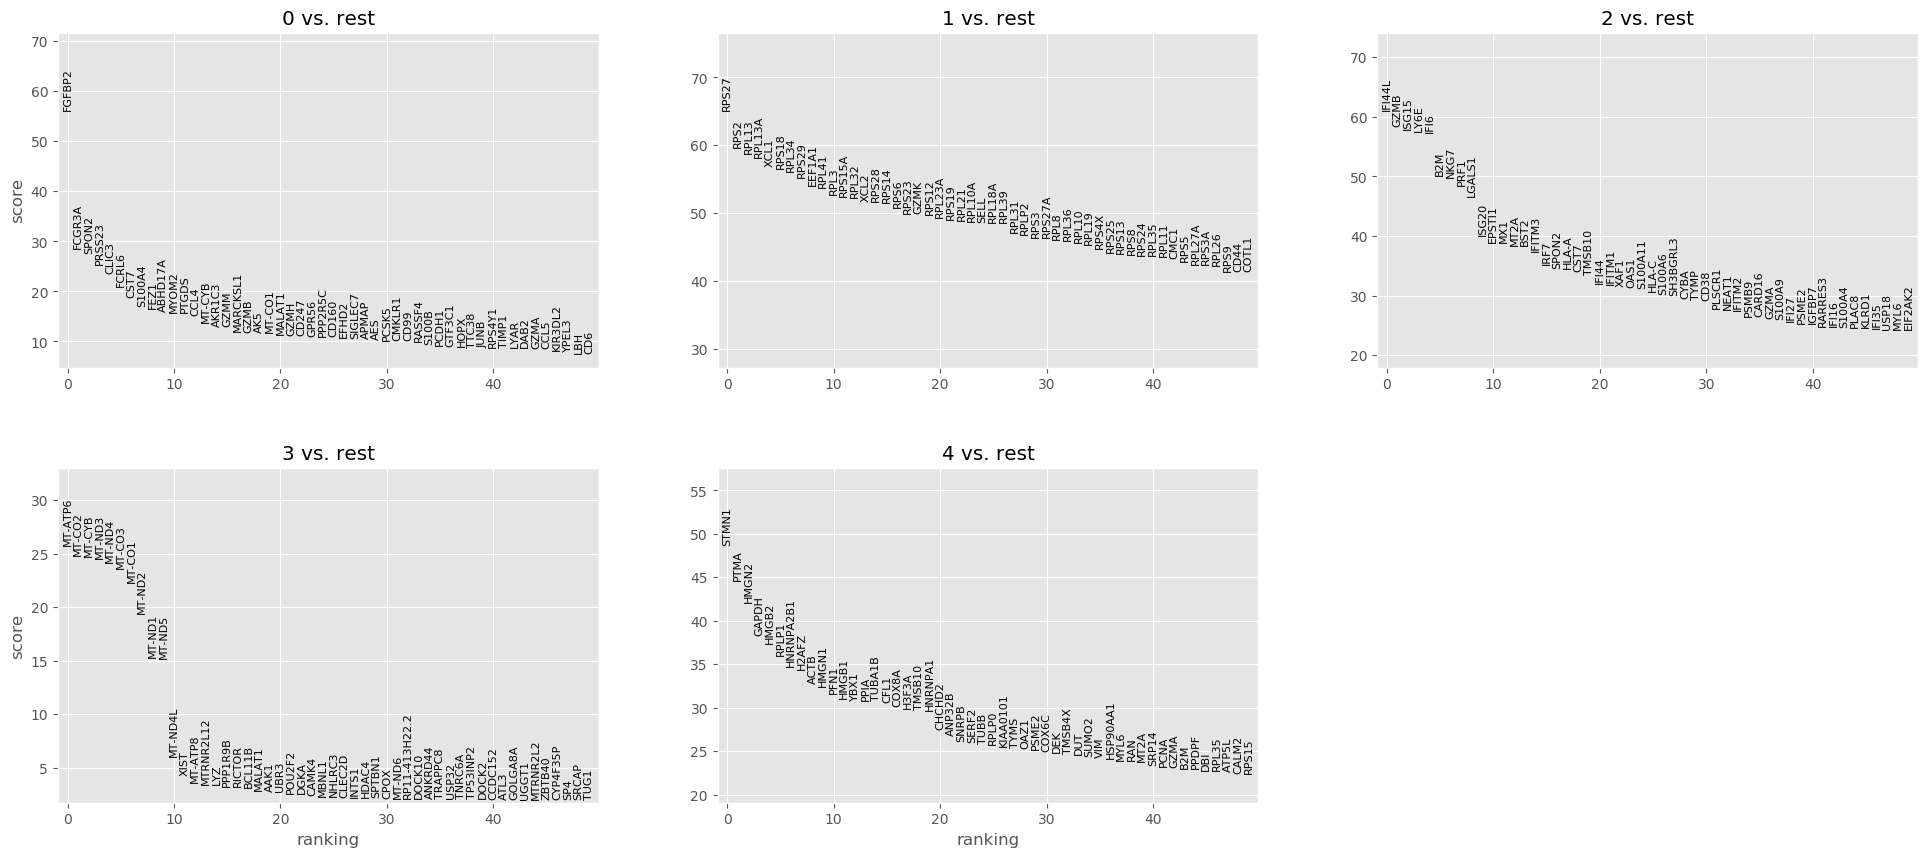

In [12]:
#---- Dif expressed genes (DEGs): t-test

#-- Finding marker genes
matplotlib.style.use('ggplot') 
rcParams['figure.figsize'] = (8,5)
sc.tl.rank_genes_groups(NK, 'louvain', method='t-test')
sc.pl.rank_genes_groups(NK, n_genes=50, sharey=False,ncols=3)


In [13]:

#---- save top 100 DEGs: t-test

result = NK.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame({group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).to_csv('./DE_NK_louv_Ttest.csv')




ranking genes
    finished (0:00:47.58) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


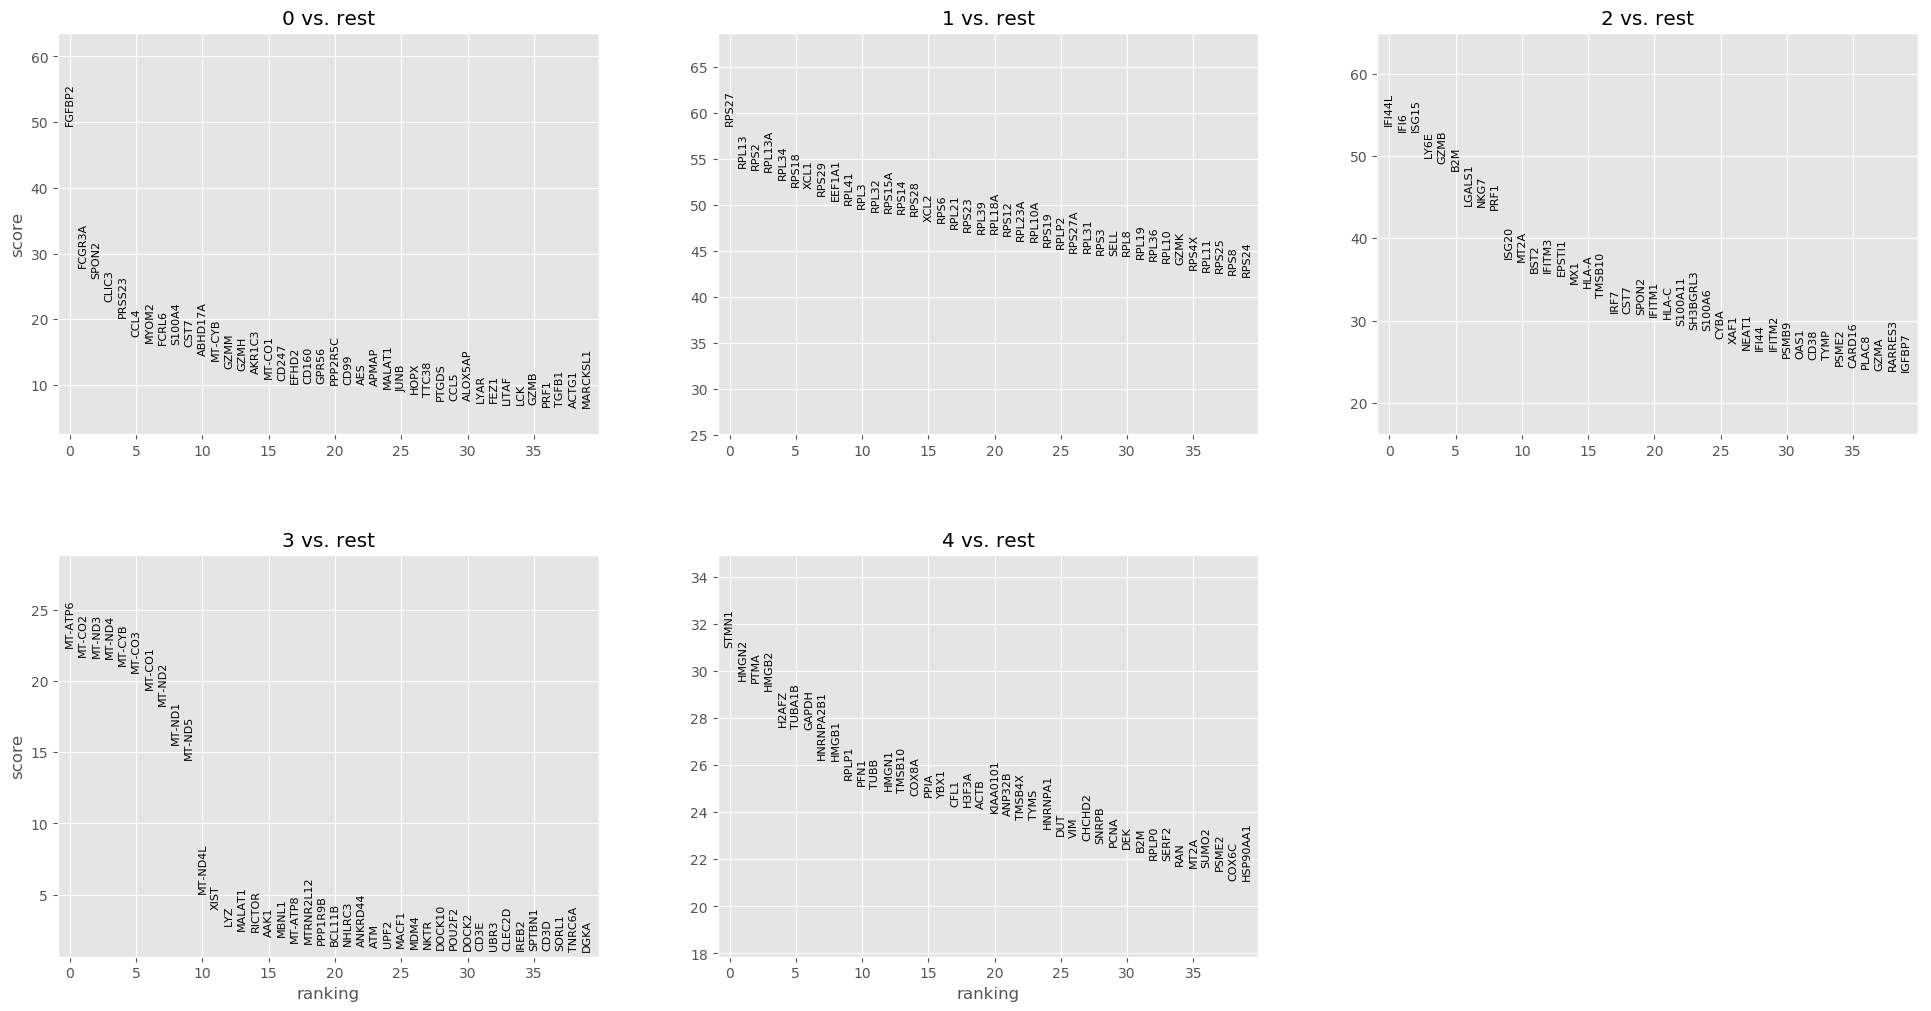

In [16]:
#---- Dif expressed genes (DEGs): Wilcoxon


matplotlib.style.use('ggplot') 
rcParams['figure.figsize'] = (8,6)
sc.tl.rank_genes_groups(NK, 'louvain', method='wilcoxon')
sc.pl.rank_genes_groups(NK, n_genes=40, sharey=False,ncols=3)



In [15]:
#---- save top 100 DEGs

result = NK.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame({group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).to_csv('./DE_NK_louv_wilcoxon.csv')



ranking genes


/home/nehard/.local/lib/python3.6/site-packages/scikit_learn-0.20.0-py3.6-linux-x86_64.egg/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nehard/.local/lib/python3.6/site-packages/scikit_learn-0.20.0-py3.6-linux-x86_64.egg/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


    finished (0:01:17.21) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids



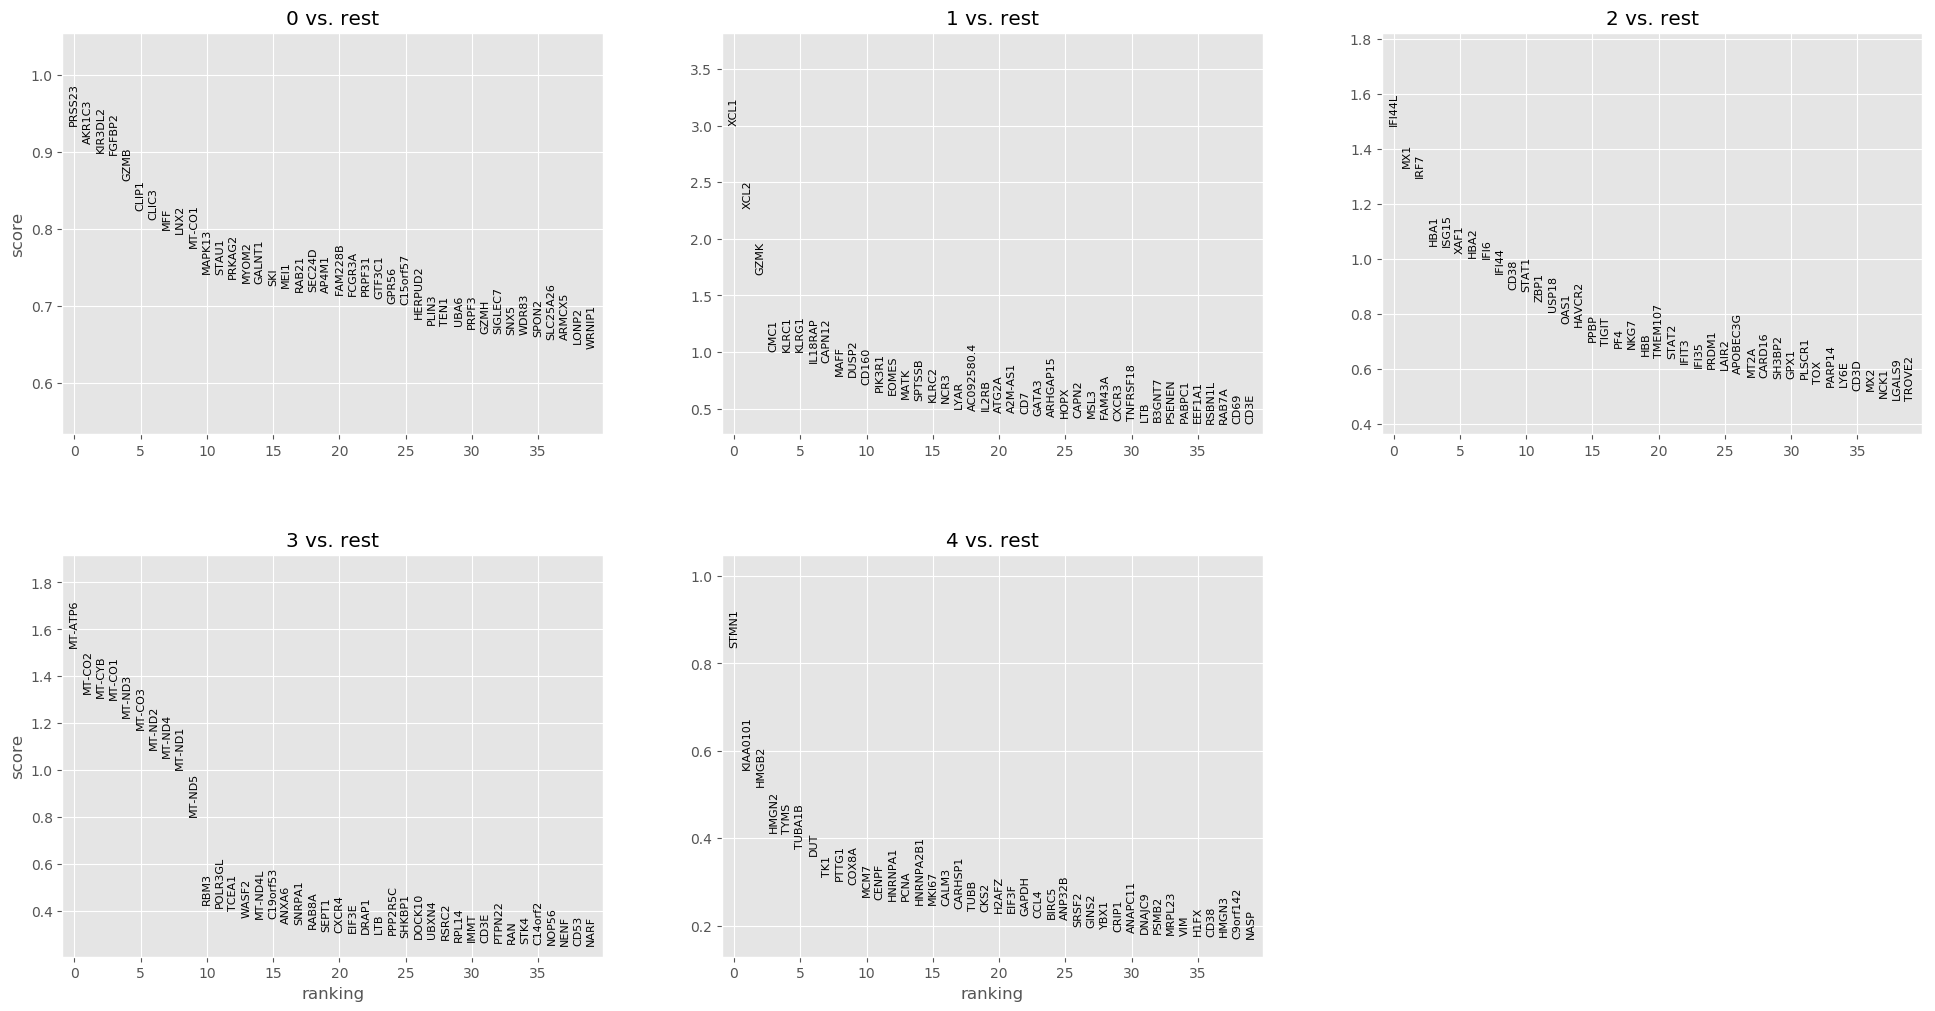

In [17]:
#---- Dif expressed genes (DEGs):logReg


matplotlib.style.use('ggplot') 
rcParams['figure.figsize'] = (8,6)
sc.tl.rank_genes_groups(NK, 'louvain', method='logreg')
sc.pl.rank_genes_groups(NK, n_genes=40, sharey=False,ncols=3)



In [18]:

#---- save top 100 DEGs

result = NK.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame({group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'scores']}).to_csv('./DE_NK_louv_logReg.csv')




In [12]:
#---- save embeddings and object 

Emb =NK.obsm.to_df()[['X_umap1', 'X_umap2', 'X_umap3']]
Emb.index = NK.obs.index
meta = NK.obs
#-- merge the DF
Mat = meta.join(Emb)
#-- save meta data + embbedings 
Mat.to_csv('./Meta/MetaEmb_NK_051119.csv')
#-- save the object 
NK.write('./H5AD/pSLE_NK_051119.h5ad')



In [9]:
NK.uns['clusters_colors']=['#e41a1c','#999999','#377eb8','#4daf4a','#984ea3','#ff7f00','#a65628','#f781bf','#7fcdbb','#cab2d6', 
                           "#060404", "#bdbdbd", "#addd8e","#dd1c77","#fed976", "#08519c","#7a0177", "#016450", "#df65b0",
                                  "#a6761d",'#41b6c4',"#02818a",'#ece2f0','#d94801']

NK.uns['Groups_colors']= ['#78c679','#756bb1']
NK.uns['DA_colors']=["yellow","red","red","#d2f3e0","grey"]
NK.uns['SLEDAI_1_colors']=["yellow","yellow","yellow",
                         "red","red","red",
                         "red","red","red",
                         "#d2f3e0","grey"]


In [6]:
new_cat= ['0', '2', '4', '5', '6', '8', '12', '16', '19', 'ND', 'none']
NK.rename_categories('SLEDAI_1', new_cat)


saving figure to file ./figures/umap_NK_cSLE.pdf


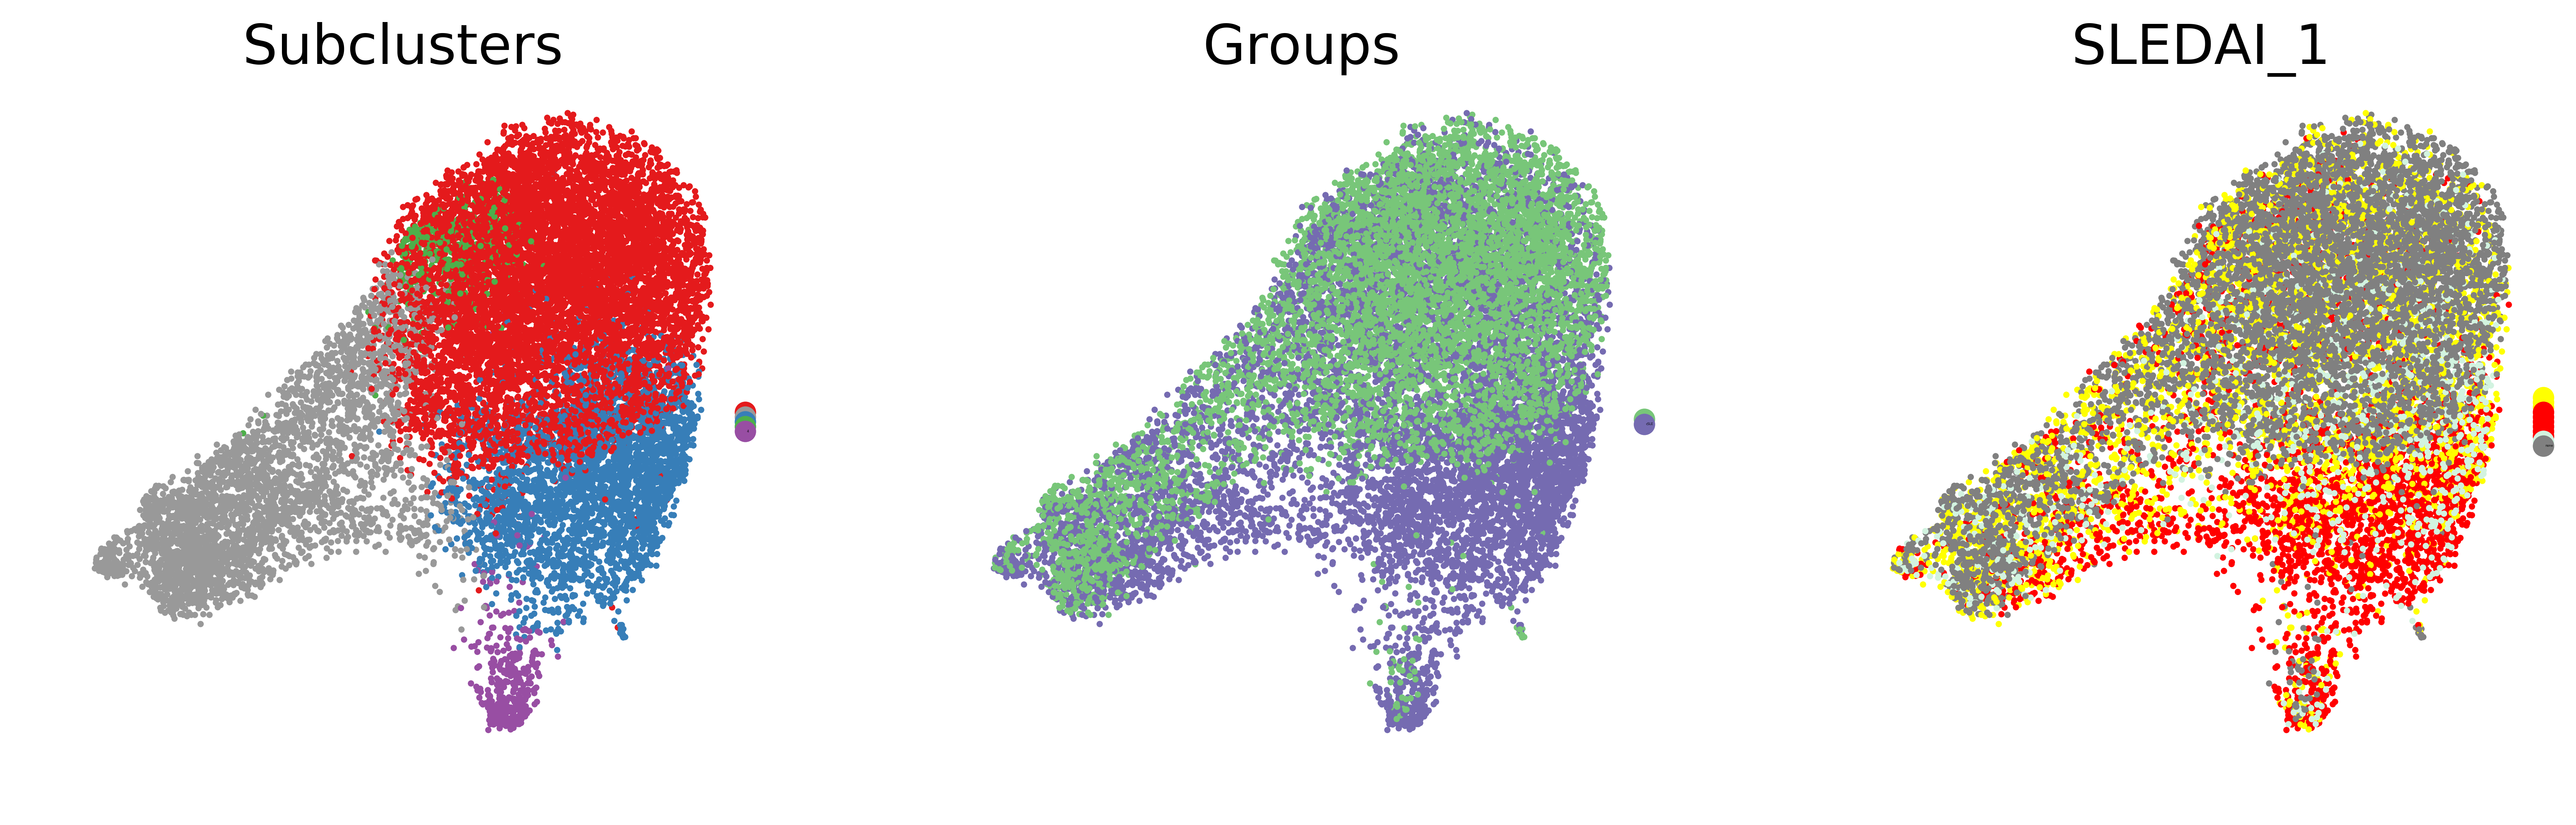

In [10]:
#-- 05-11-19 : figure paper 

matplotlib.style.use('default')  
rcParams['figure.figsize'] = (3,3)
sc.settings.set_figure_params(dpi=300)  # set sufficiently high resolution for saving


plt.rc('font', size=18)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

genes = ['Subclusters','Groups','SLEDAI_1']
sc.pl.umap(NK, color=genes, color_map='OrRd',size=17, ncols=5, 
           legend_fontsize=0, frameon=False,save='_NK_cSLE.pdf') 
#CD21=CR2
